# Random Forest

### Made By Jack & Karima

## 1) Load libraries & set options

In [1]:
%%time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support , accuracy_score

from sklearn import tree

import shap
shap.initjs()
np.random.seed(1)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings  # For handling warnings
warnings.filterwarnings('ignore')  # Ignore all warnings
import random

print("Done!")

Done!
Wall time: 3.73 s


## 2) Load data

In [2]:
# read csv files from repo
train_df = df = pd.read_csv("train_df.csv")
test_df = df = pd.read_csv("test_df.csv")
valid_df = df = pd.read_csv("valid_df.csv")

In [3]:
train_df.shape, test_df.shape, valid_df.shape

((273613, 14), (27471, 14), (27470, 14))

### Preview datasets

In [4]:
train_df.head(1)

,days_since_start,cough,fever,sore_throat,shortness_of_breath,head_ache,test_indication_Abroad,test_indication_Contact with confirmed,test_indication_Other,age_60_and_above_NaN,age_60_and_above_Yes,gender_NaN,gender_male,is_corona_positive
0,-1.209602,-0.512428,-0.438907,-0.223578,-0.18135,-0.30037,-0.300897,-0.515508,0.647058,-0.82621,-0.3388,-0.276227,-0.903927,0


In [5]:
test_df.head(1)

,days_since_start,cough,fever,sore_throat,shortness_of_breath,head_ache,test_indication_Abroad,test_indication_Contact with confirmed,test_indication_Other,age_60_and_above_NaN,age_60_and_above_Yes,gender_NaN,gender_male,is_corona_positive
0,0.820149,-0.512428,-0.438907,-0.223578,-0.18135,-0.30037,-0.300897,-0.515508,0.647058,1.210346,-0.3388,-0.276227,1.106283,0


In [6]:
valid_df.head(1)

,days_since_start,cough,fever,sore_throat,shortness_of_breath,head_ache,test_indication_Abroad,test_indication_Contact with confirmed,test_indication_Other,age_60_and_above_NaN,age_60_and_above_Yes,gender_NaN,gender_male,is_corona_positive
0,-0.722462,-0.512428,-0.438907,-0.223578,-0.18135,-0.30037,-0.300897,-0.515508,0.647058,-0.82621,-0.3388,-0.276227,-0.903927,0


## 3) Split train/test/valid sets into X and y

In [7]:
# split into features (X) and target (y)
X_train = train_df.drop("is_corona_positive", axis=1)
X_test = test_df.drop("is_corona_positive", axis=1)
X_valid = valid_df.drop("is_corona_positive", axis=1)

y_train = train_df["is_corona_positive"]
y_test = test_df["is_corona_positive"]
y_valid = valid_df["is_corona_positive"]

In [8]:
X_train.shape, X_test.shape, X_valid.shape

((273613, 13), (27471, 13), (27470, 13))

In [9]:
y_train.shape, y_test.shape, y_valid.shape

((273613,), (27471,), (27470,))

## 4) Build base RF model (untuned)

In [10]:
%%time

# create random forest classifier
rf = RandomForestClassifier()

# fit rf model on training data
rf.fit(X_train, y_train)

# make predictions on the train/test data
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# tuple of precision, recall, f1 and support for train/test set
res_train = precision_recall_fscore_support(y_train, y_pred_train)
res_test = precision_recall_fscore_support(y_test, y_pred_test)

Wall time: 9.33 s


## 5) Evaluate Base Model

In [11]:
# display key metrics
print('The accuracy for the training set is {:.3f} \nThe accuracy for the test set is {:.3f}'.format(
    accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)))
print('The F1 score for the training set is {:.3f} \nThe F1 score for the test set is {:.3f}'.format(
    f1_score(y_train, y_pred_train, average = 'macro'), f1_score(y_test, y_pred_test, average = 'macro')))
print('For the COVID Negative class the precision is {:.3f} for the training set and it is {:.3f} on the test set'.format(
    res_train[0][0], res_test[0][0]))
print('For the COVID positive class the recall is {:.3f} for the training set and it is {:.3f} on the test set'.format(
    res_train[1][0], res_test[1][0]))
print('For the COVID Positive class the precision is {:.3f} for the training set and it is {:.3f} on the test set'.format(
    res_train[0][1], res_test[0][1]))
print('For the COVID Negative class the recall is {:.3f} for the training set and it is {:.3f} on the test set'.format(
    res_train[1][1], res_test[1][1]))

The accuracy for the training set is 1.000 
The accuracy for the test set is 0.970
The F1 score for the training set is 1.000 
The F1 score for the test set is 0.831
For the COVID Negative class the precision is 1.000 for the training set and it is 0.979 on the test set
For the COVID positive class the recall is 1.000 for the training set and it is 0.989 on the test set
For the COVID Positive class the precision is 1.000 for the training set and it is 0.756 on the test set
For the COVID Negative class the recall is 1.000 for the training set and it is 0.614 on the test set


In [12]:
print(confusion_matrix(y_test, y_pred_test))

[[25775   280]
 [  547   869]]


In [14]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     26055
           1       0.76      0.61      0.68      1416

    accuracy                           0.97     27471
   macro avg       0.87      0.80      0.83     27471
weighted avg       0.97      0.97      0.97     27471



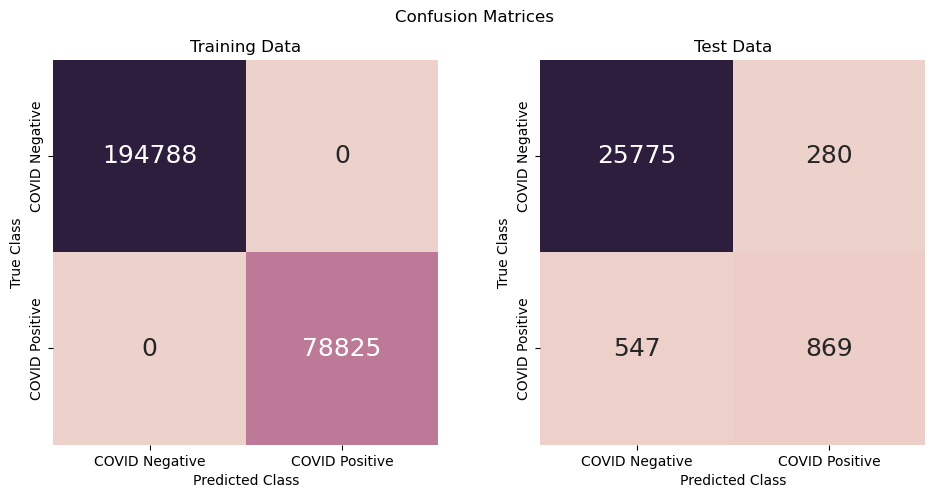

In [15]:
# function to plot confusion matrices
def plot_cnf(y_true, y_pred, ax, title):
    labs = ['COVID Negative', 'COVID Positive']
    conf_mat = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_mat,annot=True,fmt='d',cbar=False, xticklabels= labs, yticklabels= labs,ax = ax,
                square = True, cmap=sns.cubehelix_palette(as_cmap=True), annot_kws={"size": 18})
    ax.set_ylabel('True Class')
    ax.set_xlabel('Predicted Class')
    ax.set_title(title)
# Generate figure with 2 subplots
fig, axs =  plt.subplots(1,2, figsize = (12,5))
# plot confusion matrices
plot_cnf(y_train, y_pred_train, axs[0], "Training Data")
plot_cnf(y_test, y_pred_test, axs[1], "Test Data")
fig.suptitle('Confusion Matrices')
fig.subplots_adjust(wspace=0.1)
plt.show()

## 6) Hyperparamter tuning on validation set

### 6.1) Grid Search

In [16]:
%%time

# create random forest classifier
rf_valid = RandomForestClassifier()

# fit rf model on training data
rf_valid.fit(X_valid, y_valid)

# make predictions on the test data
y_pred = rf_valid.predict(X_valid)

Wall time: 1.14 s


In [17]:
%%time

# define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4, 6]
}


# perform grid search with cross-validation
grid_search = GridSearchCV(estimator = rf_valid, param_grid = param_grid, cv=5)

# fit on training data
grid_search.fit(X_train, y_train)

Wall time: 21min 54s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300]})

In [18]:
# best hyperparameters and the corresponding mean cross-validated score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9998245695519905


### 6.2) Best Model

In [19]:
%%time

# create best rf model using tuned hyperparameters
rf_best = RandomForestClassifier(max_depth = None,
                                 min_samples_split = 2,
                                 n_estimators = 100)

# fit rf model on validation data
rf_best.fit(X_train, y_train)

# make predictions on the train/test data
y_pred_valid = rf_best.predict(X_valid)
y_pred_test_tuned = rf_best.predict(X_test)

# tuple of precision, recall, f1 and support for train/test set
res_valid = precision_recall_fscore_support(y_valid, y_pred_valid)
res_test_tuned = precision_recall_fscore_support(y_test, y_pred_test_tuned)

Wall time: 6.92 s


In [20]:
#display key metrics
print('The accuracy for the validation set is {:.3f} \nThe accuracy for the test set is {:.3f}'.format(
    accuracy_score(y_valid, y_pred_valid), accuracy_score(y_test, y_pred_test_tuned)))
print('The F1 score for the validation set is {:.3f} \nThe F1 score for the test set is {:.3f}'.format(
    f1_score(y_valid, y_pred_valid, average = 'macro'), f1_score(y_test, y_pred_test_tuned, average = 'macro')))
print('For the COVID Negative class the precision is {:.3f} for the validation set and it is {:.3f} on the test set'.format(
    res_valid[0][0], res_test_tuned[0][0]))
print('For the COVID positive class the recall is {:.3f} for the validation set and it is {:.3f} on the test set'.format(
    res_valid[1][0], res_test_tuned[1][0]))
print('For the COVID Positive class the precision is {:.3f} for the validation set and it is {:.3f} on the test set'.format(
    res_valid[0][1], res_test_tuned[0][1]))
print('For the COVID Negative class the recall is {:.3f} for the validation set and it is {:.3f} on the test set'.format(
    res_valid[1][1], res_test_tuned[1][1]))

The accuracy for the validation set is 0.971 
The accuracy for the test set is 0.970
The F1 score for the validation set is 0.844 
The F1 score for the test set is 0.832
For the COVID Negative class the precision is 0.980 for the validation set and it is 0.979 on the test set
For the COVID positive class the recall is 0.990 for the validation set and it is 0.989 on the test set
For the COVID Positive class the precision is 0.780 for the validation set and it is 0.758 on the test set
For the COVID Negative class the recall is 0.641 for the validation set and it is 0.616 on the test set


In [21]:
print(confusion_matrix(y_test, y_pred_test_tuned))

[[25777   278]
 [  544   872]]


In [22]:
print(classification_report(y_test, y_pred_test_tuned))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     26055
           1       0.76      0.62      0.68      1416

    accuracy                           0.97     27471
   macro avg       0.87      0.80      0.83     27471
weighted avg       0.97      0.97      0.97     27471



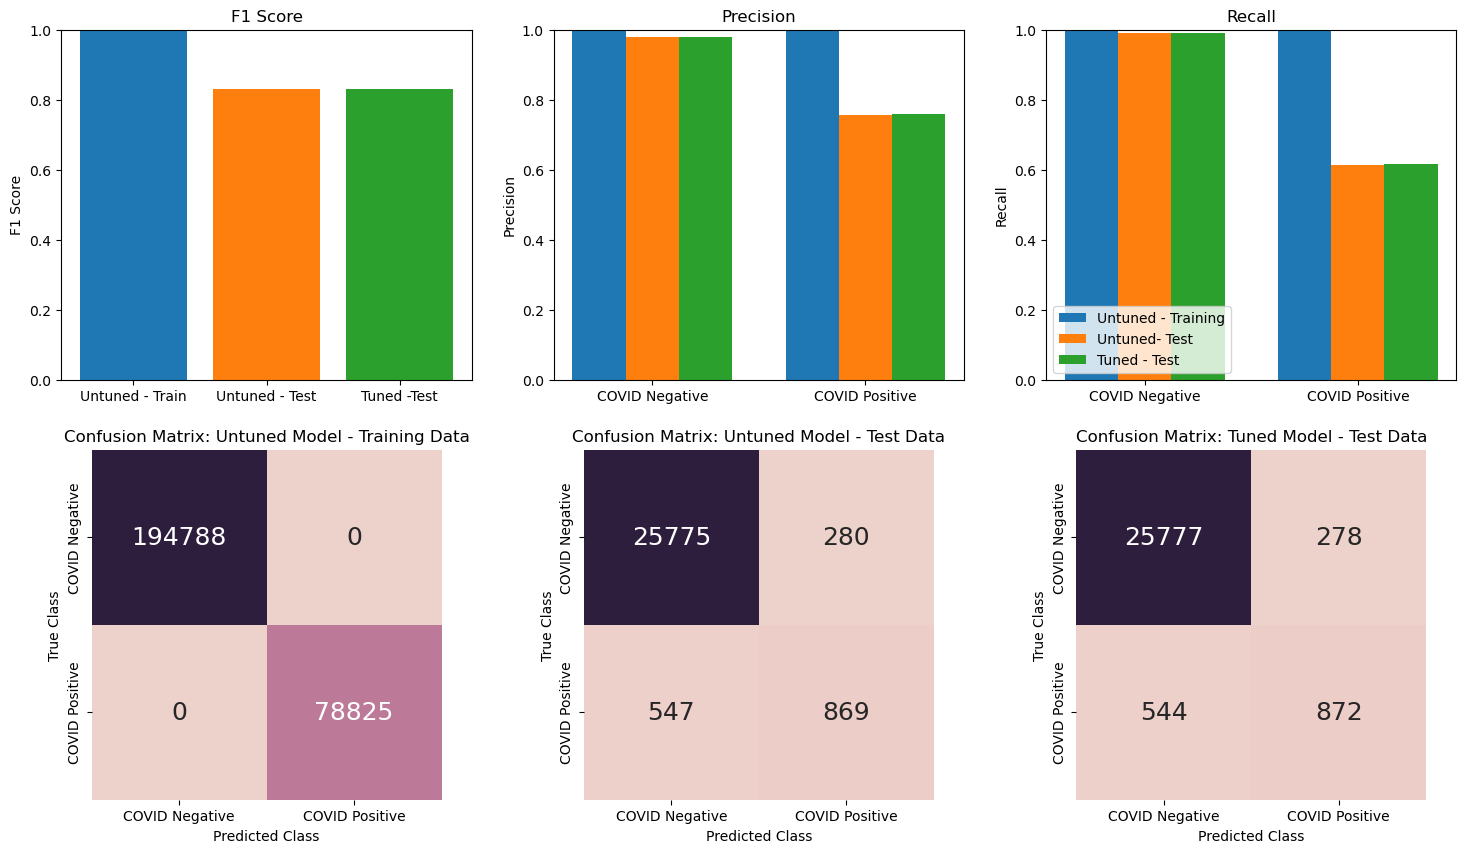

In [23]:
def plot_metrics(data, ax, metric):
    classes = ('COVID Negative', 'COVID Positive')
    x = np.arange(len(classes))
    multiplier = 0
    for var, value in data.items():
        offset = multiplier * 0.25
        ax.bar(x + offset, value, 0.25, label=var)
        multiplier += 1
    ax.set_ylabel(metric)
    ax.set_title(metric)
    ax.set_xticks(ticks = [0.25, 1.25])
    ax.set_xticklabels(labels = classes)
    ax.set_ylim(0, 1)

fig, axs = plt.subplots(2,3, figsize = (18, 10))
# data for weighted F1 score
f1_data = [f1_score(y_train, y_pred_train, average = 'macro'),f1_score(y_test, y_pred_test, average = 'macro'),f1_score(y_test, y_pred_test_tuned, average = 'macro')]
# plot weighted F1 score
axs[0,0].bar([1,2,3], f1_data,color = ['C0', 'C1', 'C2'])
axs[0,0].set_ylim(0, 1)
axs[0,0].set_ylabel('F1 Score')
axs[0,0].set_title('F1 Score')
axs[0,0].set_xticks(ticks = [1,2,3])
axs[0,0].set_xticklabels(labels = ['Untuned - Train', 'Untuned - Test', 'Tuned -Test'])
#plot precision
plot_metrics({'Untuned - Training': res_train[0],'Untuned- Test': res_test[0],'Tuned - Test': res_test_tuned[0]}, axs[0,1], 'Precision')
#plot recall
plot_metrics({'Untuned - Training': res_train[1],'Untuned- Test': res_test[1],'Tuned - Test': res_test_tuned[1]}, axs[0,2], 'Recall')
#plot legend for last subplot of row 
axs[0,2].legend(loc='lower left')
# plot confusion matrices
plot_cnf(y_train, y_pred_train, axs[1,0], 'Confusion Matrix: Untuned Model - Training Data')
plot_cnf(y_test, y_pred_test, axs[1,1], 'Confusion Matrix: Untuned Model - Test Data')
plot_cnf(y_test, y_pred_test_tuned, axs[1,2], 'Confusion Matrix: Tuned Model - Test Data')

fig.subplots_adjust(wspace=0.2)
plt.show()

### 6.3) Best model (visualise first tree)

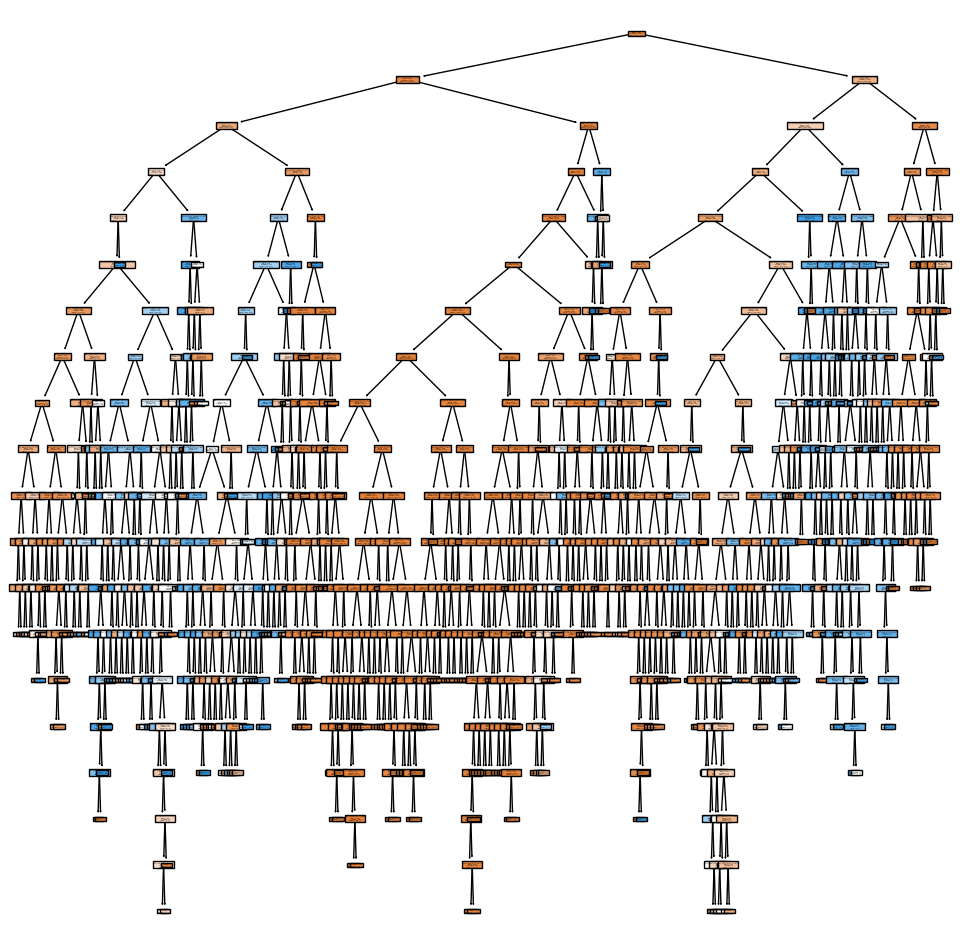

Wall time: 38.3 s


In [24]:
%%time

# extract a single decision tree from the model & visualise
tree_estimator = rf_valid.estimators_[0]  # choose the index of the tree
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(tree_estimator, feature_names=X_valid.columns, filled=True, ax=ax)
plt.show()

### 6.4) Best model (feature importance)

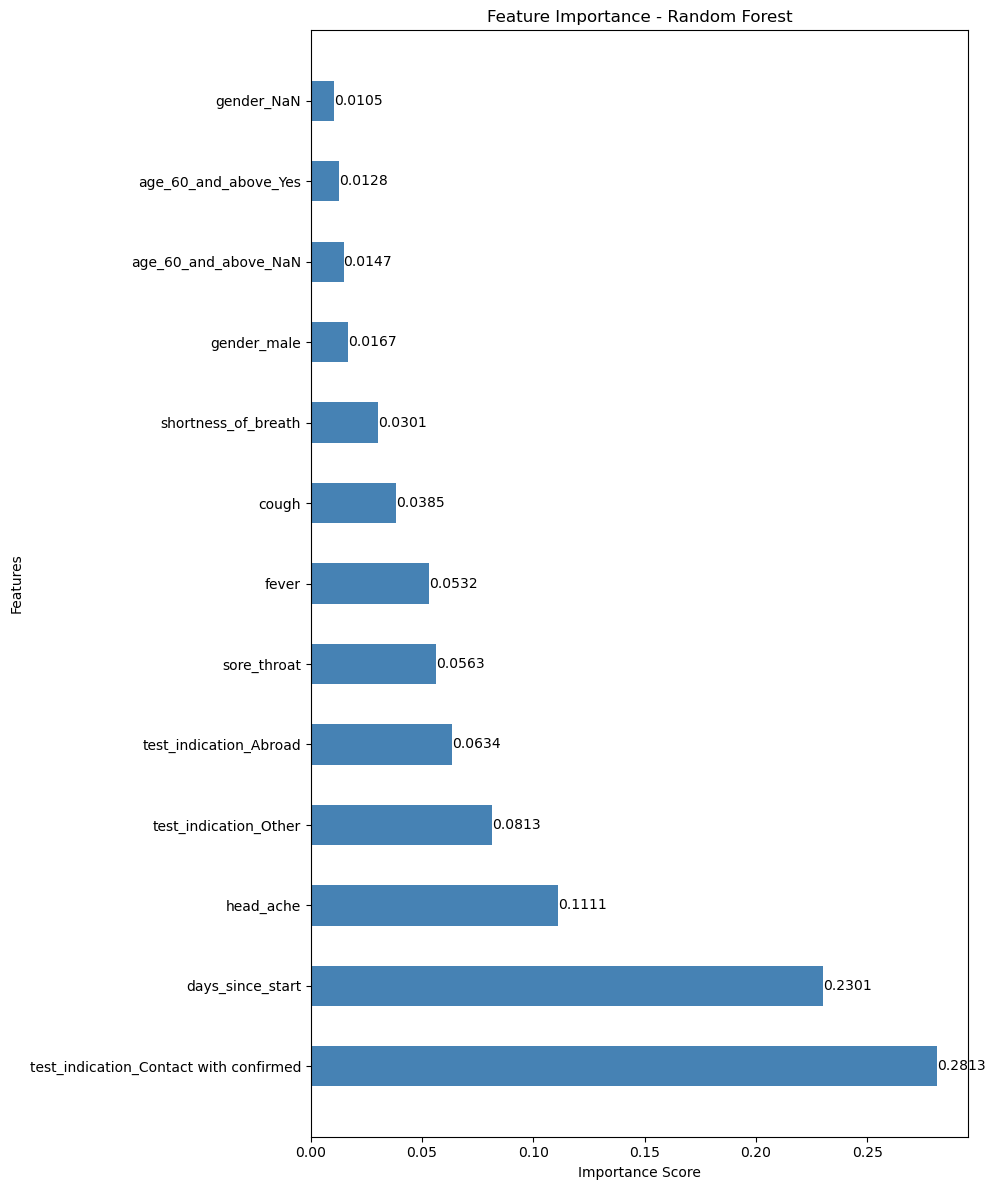

Wall time: 220 ms


In [25]:
%%time

# Get feature importances from the Random Forest model
importances = rf_valid.feature_importances_

# Get the feature names
feature_names = X_valid.columns  # Replace X with your input features

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Set the maximum number of features to display
max_num_features = 30
indices = indices[:max_num_features]
importances = importances[indices]
feature_names = feature_names[indices]

# Plot feature importances as horizontal bar plot
plt.figure(figsize=(10, 12))
plt.barh(range(len(importances)), importances, align='center', color='steelblue', height=0.5)
plt.yticks(range(len(importances)), feature_names)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance - Random Forest')

# Add bar values on the end of the bars
for i, v in enumerate(importances):
    plt.text(v, i, f'{v:.4f}', color='black', va='center')

plt.tight_layout()
plt.show()

### 6.5) Best model (SHAP plots)

In [23]:
%%time

# fit the explainer
explainer2 = shap.Explainer(rf_best.predict, X_valid)

# calculate the SHAP values (takes some time)
shap_values2 = explainer2(X_valid)

Permutation explainer: 27471it [30:24:34,  3.99s/it]                                                                   


Wall time: 1d 6h 24min 34s


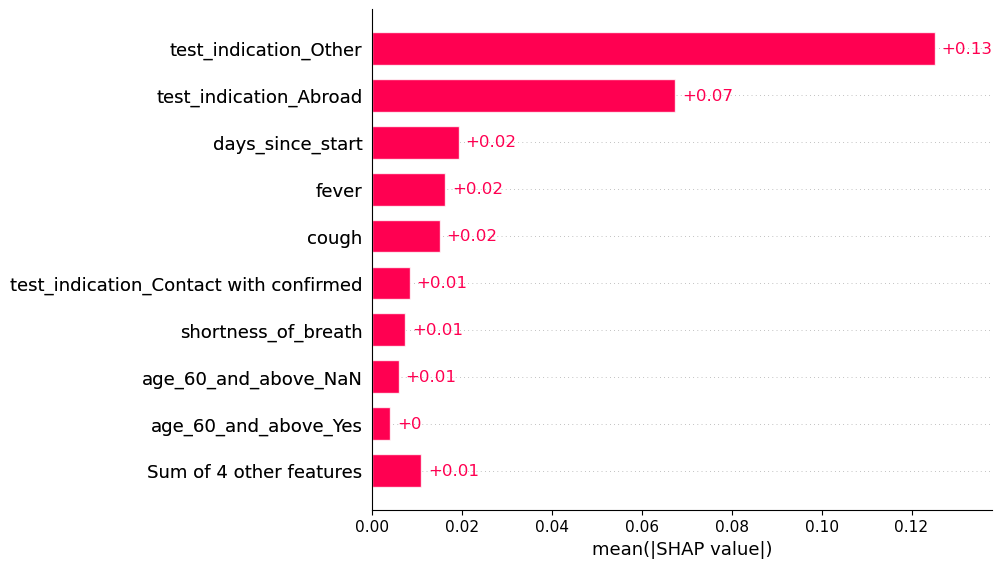

In [25]:
shap.plots.bar(shap_values2)

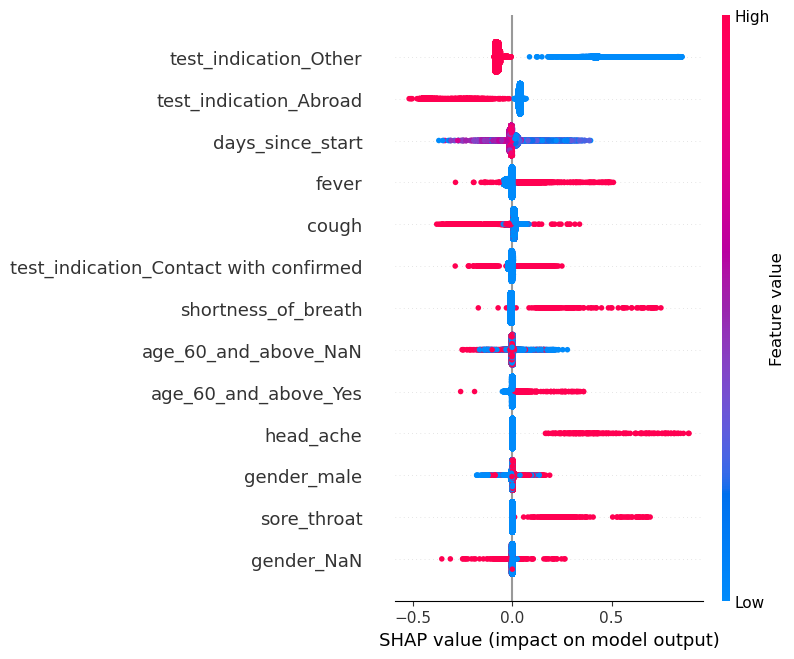

In [26]:
shap.summary_plot(shap_values2)

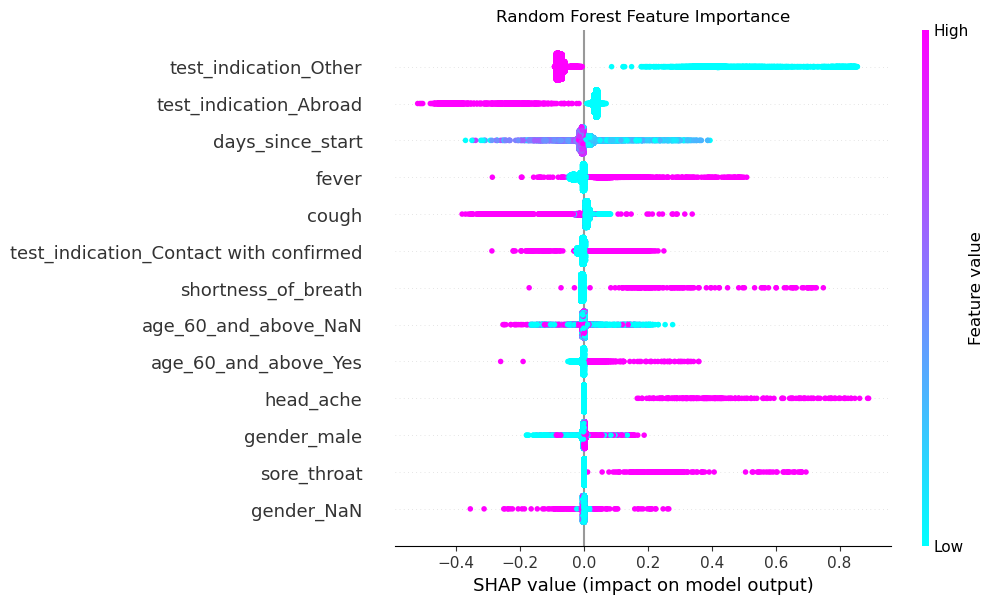

In [27]:
shap.plots.beeswarm(shap_values2, max_display=25, color=plt.get_cmap("cool"), show=False)
plt.title('Random Forest Feature Importance')
plt.show()

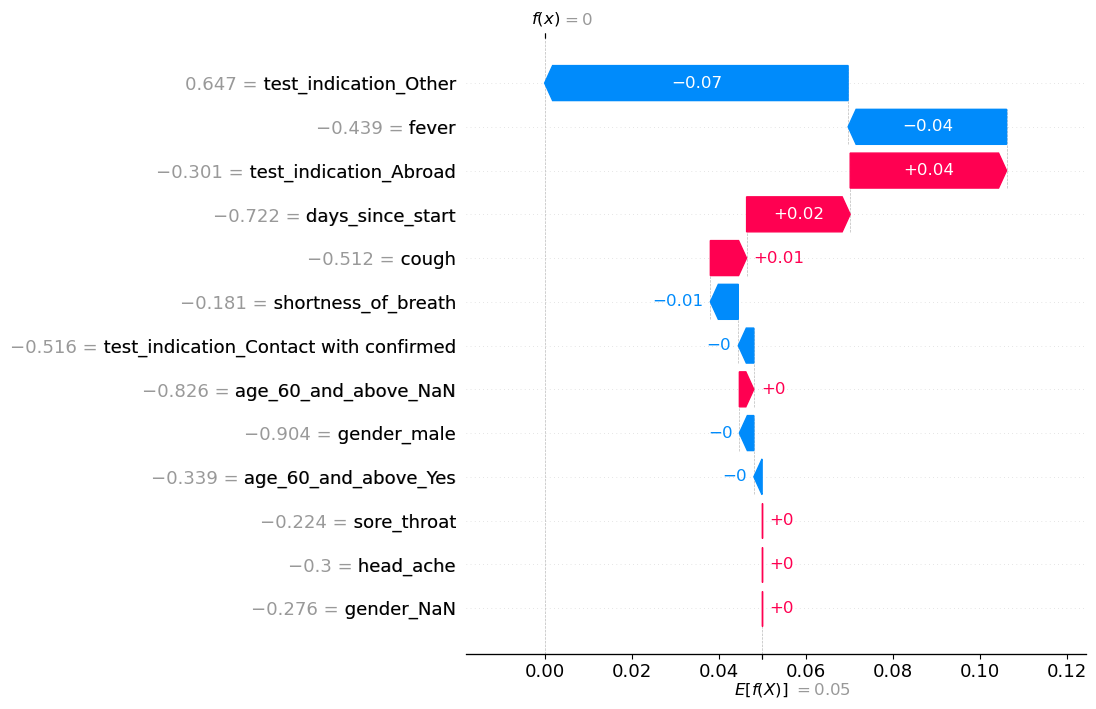

In [28]:
shap.plots.waterfall(shap_values2[2], max_display=25)